# Diamonds Price Prediction

## Dataset

https://www.kaggle.com/datasets/resulcaliskan/diamonds

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Reading the dataset

In [2]:
data = pd.read_csv("diamonds.csv")
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
data.isna().sum(axis=0)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## Data Preprocessing

In [5]:
print(data["cut"].unique())
print(data["color"].unique())
print(data["clarity"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [6]:
cut = pd.get_dummies(data['cut'],drop_first=True)
color = pd.get_dummies(data['color'],drop_first=True)
clarity = pd.get_dummies(data['clarity'],drop_first=True)

In [7]:
cut

,Good,Ideal,Premium,Very Good
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
53935,0,1,0,0
53936,1,0,0,0
53937,0,0,0,1
53938,0,0,1,0


In [8]:
color

,E,F,G,H,I,J
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
53935,0,0,0,0,0,0
53936,0,0,0,0,0,0
53937,0,0,0,0,0,0
53938,0,0,0,1,0,0


In [9]:
clarity

,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
53935,0,1,0,0,0,0,0
53936,0,1,0,0,0,0,0
53937,0,1,0,0,0,0,0
53938,0,0,1,0,0,0,0


In [10]:
data = pd.concat([data,cut,color,clarity],axis=1)

In [11]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334,...,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757,...,1,0,0,0,0,1,0,0,0,0


In [12]:
data.drop(["cut","color","clarity"], axis=1, inplace=True)
data

,carat,depth,table,x,y,z,price,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,2757,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,2757,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,2757,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,2757,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [13]:
y = data["price"]
X = data.drop("price", axis=1)

In [14]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [15]:
X

,carat,depth,table,x,y,z,Good,Ideal,Premium,Very Good,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [16]:
X = X.values
y = y.values

## Splitting data into training and testing

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12)

In [18]:
print("Train set =", X_train.shape)
print("Train labels =", y_train.shape)
print("Test set =", X_test.shape)
print("Test labels =", y_test.shape)

Train set = (37758, 23)
Train labels = (37758,)
Test set = (16182, 23)
Test labels = (16182,)


## Lineer Regression

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Prediction 

In [20]:
y_pred = model.predict(X_test)

## Results

Text(0, 0.5, 'y_test')

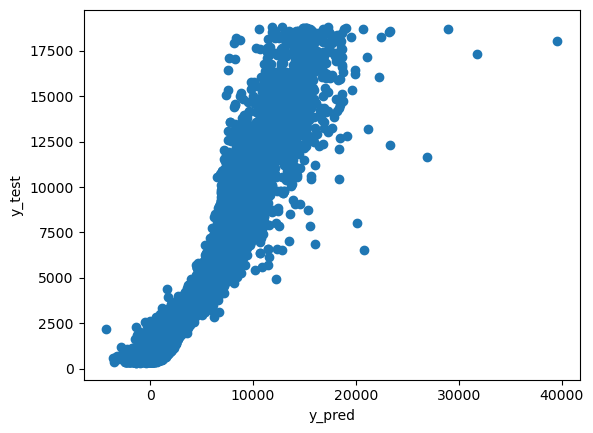

In [21]:
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [22]:
model.score(X_test, y_test)

0.9194867594479159